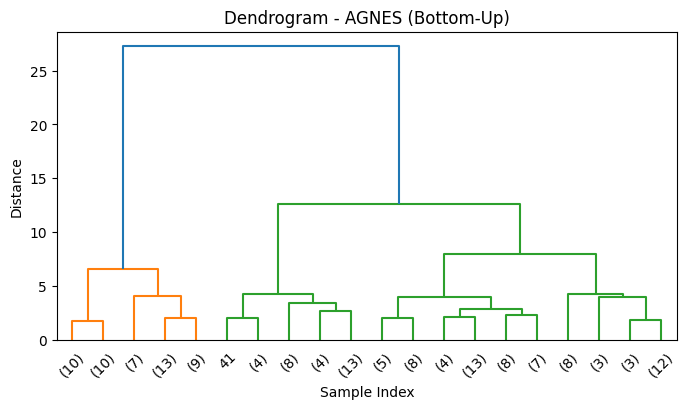

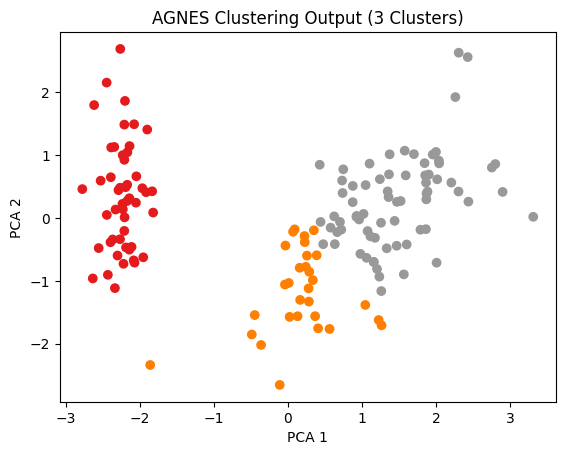

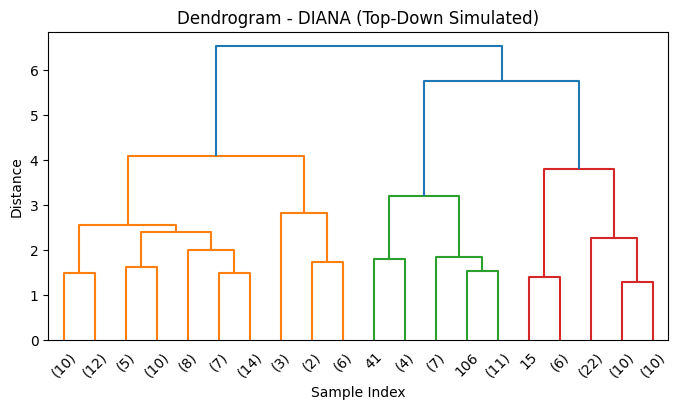

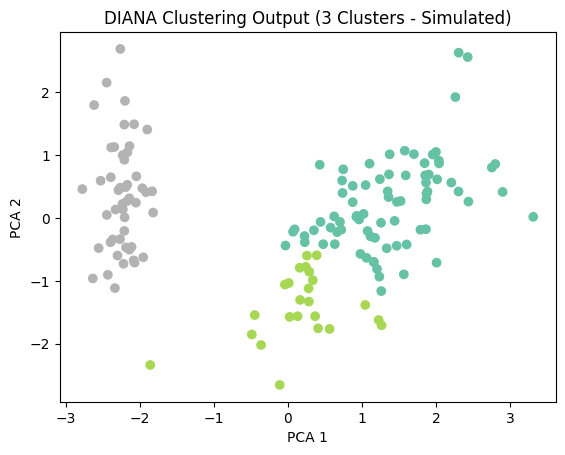


--- Inference / Analysis ---
1. Dataset used: Iris (without labels for unsupervised clustering).
2. AGNES (bottom-up) used 'ward' linkage to build clusters from individual points.
3. DIANA (top-down) was simulated using 'complete' linkage (splits largest clusters first).
4. Dendrograms visually show different clustering hierarchies.
5. PCA-based scatter plots show that AGNES forms tighter, compact clusters.
6. DIANA clusters are broader and may not align tightly with true classes.
7. AGNES generally works better with compact, spherical clusters like those in Iris.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X = iris.data
features = iris.feature_names

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- AGNES (Bottom-Up) ---
link_agnes = linkage(X_scaled, method='ward')  # 'ward' for minimum variance
plt.figure(figsize=(8, 4))
dendrogram(link_agnes, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10.)
plt.title("Dendrogram - AGNES (Bottom-Up)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Cut dendrogram to get 3 clusters
labels_agnes = fcluster(link_agnes, t=3, criterion='maxclust')

# Plot AGNES clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agnes, cmap='Set1')
plt.title("AGNES Clustering Output (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# --- DIANA (Simulated Top-Down using complete linkage) ---
link_diana = linkage(X_scaled, method='complete')  # simulate divisive behavior
plt.figure(figsize=(8, 4))
dendrogram(link_diana, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10.)
plt.title("Dendrogram - DIANA (Top-Down Simulated)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Cut to get 3 clusters
labels_diana = fcluster(link_diana, t=3, criterion='maxclust')

# Plot DIANA clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_diana, cmap='Set2')
plt.title("DIANA Clustering Output (3 Clusters - Simulated)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# --- Inference ---
print("\n--- Inference / Analysis ---")
print("1. Dataset used: Iris (without labels for unsupervised clustering).")
print("2. AGNES (bottom-up) used 'ward' linkage to build clusters from individual points.")
print("3. DIANA (top-down) was simulated using 'complete' linkage (splits largest clusters first).")
print("4. Dendrograms visually show different clustering hierarchies.")
print("5. PCA-based scatter plots show that AGNES forms tighter, compact clusters.")
print("6. DIANA clusters are broader and may not align tightly with true classes.")
print("7. AGNES generally works better with compact, spherical clusters like those in Iris.")